![alt text](tsp.png)

# Heuristic 
No quality guaranteed but reasonably good result with good time

In [6]:
import random
import networkx as nx 
import matplotlib.pyplot as plt

def generate_complete_graph(n_nodes: int, weight_range: tuple = (1, 100)):
    G = nx.complete_graph(n_nodes)
    for u, v in G.edges():  # node u to node v (every connection)
        G.edges[u, v]["weight"] = random.randint(*weight_range)
    return G

def plot_graph_step(G: nx.Graph, tour: list, current_node: int, pos: tuple):
    plt.clf() # clear the plot
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500)
    path_edges = list(zip(tour, tour[1:])) # get the edges of the path, eg tour = 1,2,3,4,5 -> [(1,2), (2,3), (3,4), (4,5)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    nx.draw_networkx_nodes(G, pos, nodelist=[current_node], node_color='g', node_size=500)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.pause(0.5)


def calculate_tour_cost(G: nx.Graph, tour: list) -> int:
    return sum(G[tour[i]][tour[i+1]]['weight'] for i in range(len(tour) - 1))


def nearest_neighbor_tsp(G: nx.Graph, start_node= None):
    if start_node is None:
        start_node = random.choice(list(G.nodes))

    pos = nx.spring_layout(G)  
    plt.ion()  # turn on interactive mode
    plt.show()

    unvisited = set(G.nodes)
    unvisited.remove(start_node)
    tour = [start_node]
    current_node = start_node 

    plot_graph_step(G, tour, current_node, pos)

    while unvisited:
        # greedy nearest neighbor
        next_node = min(unvisited, key=lambda x: G[current_node][x]['weight'])
        unvisited.remove(next_node)
        tour.append(next_node)
        current_node = next_node
        plot_graph_step(G, tour, current_node, pos)

    tour.append(start_node)
    plot_graph_step(G, tour, current_node, pos)
    
    print(tour)
    tour_cost = calculate_tour_cost(G, tour)
    print(f"Constructino Heuristic Tour Cost: {tour_cost}")

    plt.ioff() # turnoff interactive mode
    plt.show()


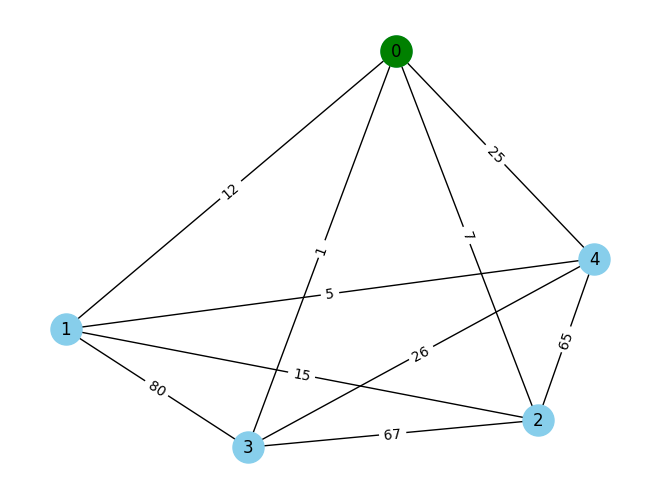

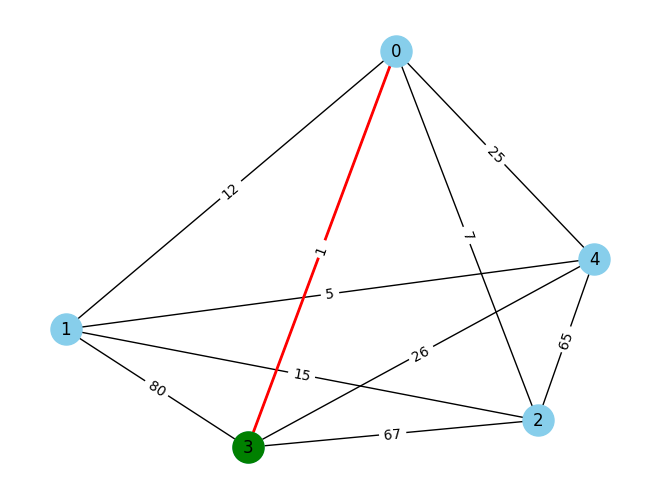

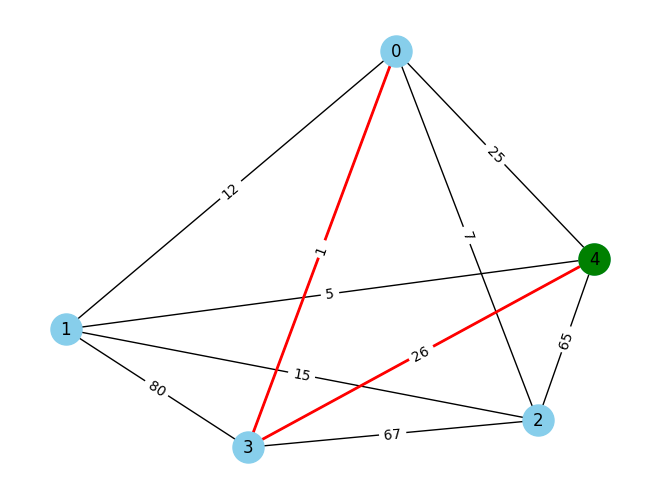

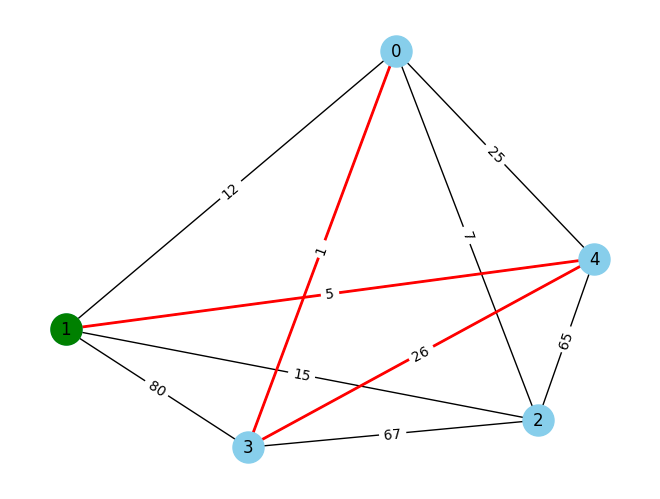

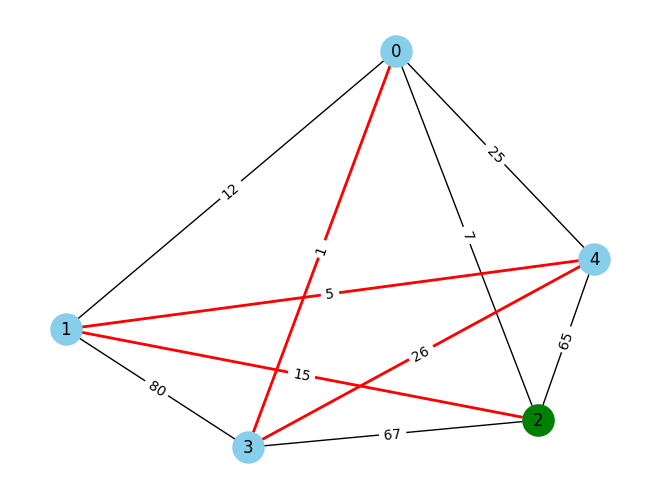

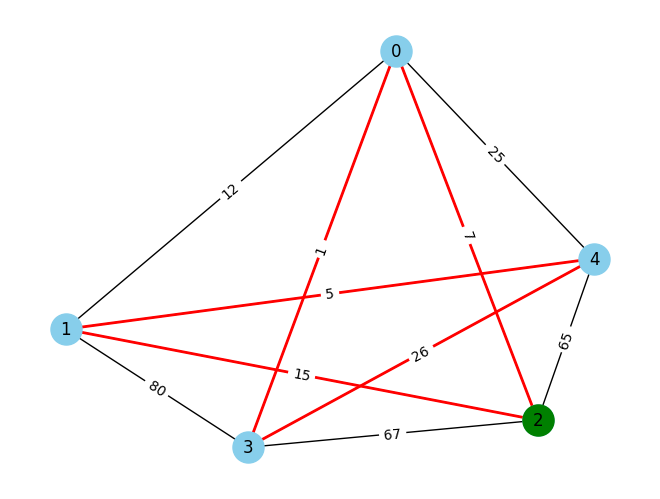

[0, 3, 4, 1, 2, 0]
Constructino Heuristic Tour Cost: 54


In [7]:
G = generate_complete_graph(5)


nearest_neighbor_tsp(G, start_node=0)